In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [3]:
annFile='../comparison/testexportcoco.json' # change here

In [4]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))


COCO categories: 
vesicle root arbuscle

COCO supercategories: 
root vesicle arbuscle


In [6]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms='arbuscle root vesicle'.split())
imgIds = coco.getImgIds(catIds=catIds )
print(len(imgIds) )


144


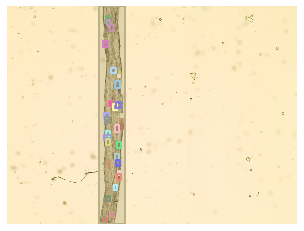

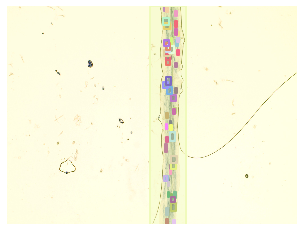

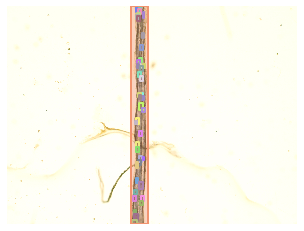

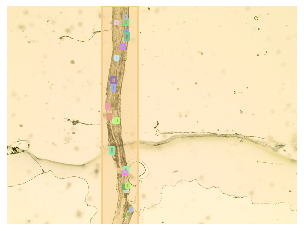

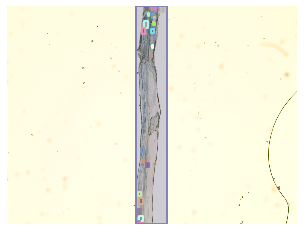

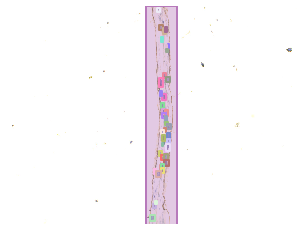

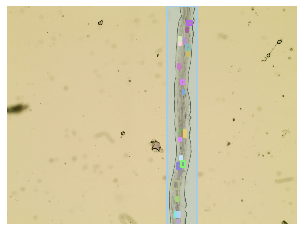

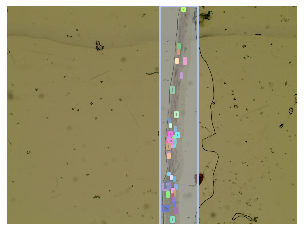

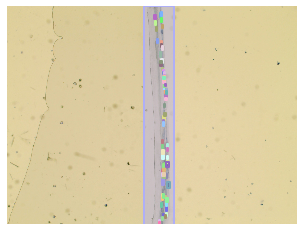

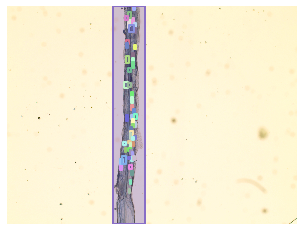

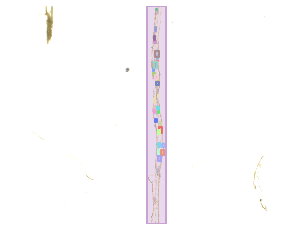

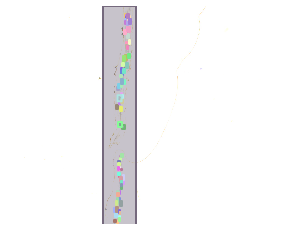

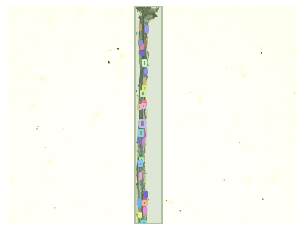

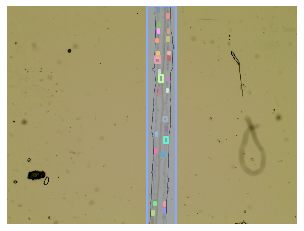

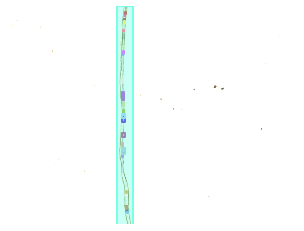

In [7]:
# load and display image
imgs = coco.loadImgs(imgIds[0:15])
dataDir = '../object-detection/cocofilesv2/'# change here
for img in imgs:
    I = io.imread(dataDir + img['id']+'.jpg')
    # use url to load image
    plt.imshow(I)
    plt.axis('off')
    annIds = coco.getAnnIds(imgIds=[img['id']], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    coco.showAnns(anns)
    plt.show()